In [3]:
import numpy as np
import pandas as pd
from numpy.linalg import *

# Функции многих переменных


## Частные производные и градиент

Для функций многих переменных (мы ограничимся рассмотрением только двухмерных случаев, так как все аналогично) $f(x, y)$ существует понятие частной производной, то есть это производная по одной из переменных, в то время как все остальные переменные зафиксированны.

То есть частные производные для функции $f(x, y)$:
1. Частная производная по $x$: $f'_{x}(x, y)=\lim_{\Delta x\to 0}\frac{f(x + \Delta x, y) - f(x, y)}{\Delta x}$
2. Частная производная по $x$: $f'_{y}(x, y)=\lim_{\Delta y\to 0}\frac{f(x, y + \Delta y) - f(x, y)}{\Delta x}$

Если у функции много параметров, то значит и много частных производных, поэтому хотелось бы работать с одной сущностью, которой и стал **градиент функции**.

**Опр.** Градиент функции $f(x_{1}, x_{2}, \dots x_{n})$ - это вектор составленный из частных производных по всем параметрам функции $\nabla f = (f'_{x_{1}}, f'_{x_{2}}, \dots, f'_{x_{n}})^{T}$.

**Теорема.** Необходимое условие экстремума функции многих переменных - равенство нулю ее градиента, то есть $\nabla f = 0$.


Кроме того, через частные производные можно записать и приращение функции в некоторой точке: 

$$
    \Delta f = f'_{x} \Delta x + f'_{y} \Delta y = (\nabla f, (\Delta x, \Delta y)^{T})
$$

<img src='img/grad_geom.png'>

Таким образом, линейное приближение функции многих переменных в точке задается плоскостью (аналогично для касательной в одномерном случае).

При невозможности вычислить аналитически используется метод градиентного спуска, основная идея которого идти по антиградиенту функции:
 $$
     x_{n+1} = x_{n} -\gamma \nabla f(\vec{x})
 $$

## Производная по направлению

**Опр.** Производная функции многих переменных $f(\vec{x})$ определяется как:
$$
    f'_{l} = \lim_{t\to 0}\frac{f(\vec{x}+t\vec{l}) - f(\vec{x})}{t},
$$
где $\vec{l}$ и $\vec{x}$ - вектора, а $t$ - число.

Легко понять что если взять плоскость сечения функции вдоль заданного направления, то это будет обычная производная - а значит *производная по направлению показывает направление наискорейшего роста функции в данной точке*.

<img src='img/der_in_direction.png'>

## Смысл градиента

Давайте распишем прирпщение функции двух переменных $f(x, y)$:

$$
    \Delta f(x, y) = f'_{x}\Delta x + f'_{y} \Delta y = (\nabla f(x, y), (\Delta x, \Delta y)^{T}).
$$


но пусть $\Delta x = t l_{x}$, $\Delta y = t l_{y}$, тогда

$$
    \Delta f(x, y) = t(\nabla f(x, y), \vec{l})
$$

И тогда производня по направлению:

$$
    \frac{\partial f}{\partial l} = \lim_{t \to 0}\frac{\Delta f}{t} = (\nabla f(x, y), \vec{l})
$$

Таким образом, так как производная по напрвлению показывает направление наискорпейшего роста функции в заданном направлении, и скалярное произведенеи принимает максимальное значение при сонаправленности векторов, то значит **изменение функции $\Delta f$ максмально, когда напрвлание наискорейшего роста функции совпадает с вектором градиента, поэтому вектор градиента и показывает направление наискорейшего роста функции**.

# Методы оптимизации

Очень хорошо, когда мы имеем дело с функцией, у которой есть градиент. 
Но иногда у функции нет градиента, и в таком случае использовать градиентные методы оптимизации становится довольно затруднительно.

Ниже мы рассмотрим методы оптимизации, которые могут работать как с функциями у котрых есть градиент, так и с теми, у которых градиент отсутствует.

Кроме того, проверим их работу на функции, имеющей градиент:
$$
    f(x) = \sin(5x)*e^{x/10}+5e^{-x/2}
$$

И на функции, очень похожей на предыдущую, но не имеющей градиента (просто целая часть от предыдущей функции):
$$
    h(x) = int[f(x)]=int(\sin(5x)*e^{x/10}+5e^{-x/2})
$$

Графики функций представленын ниже.

## Случайный поиск (hill climbing)

4763


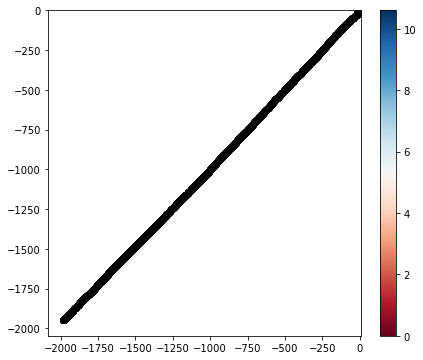

In [49]:
import matplotlib.pyplot as plt
y, x = np.meshgrid(np.arange(-5., 5., 0.01), np.arange(-5.,5, 0.01))

def f(x, y):
    return np.sqrt((x - 3)**2 + (y - 2)**2)
z = f(x, y)


fig, ax = plt.subplots(figsize=(7, 6))

c = ax.pcolormesh(x, y, z, cmap='RdBu')
fig.colorbar(c, ax = ax)

x_1 = [0.]
y_1 = [0.]


eps = 0.001
start = np.array([x_1[0], y_1[0]])
end = np.zeros(2)
d = 0.001

n = 0
while True:
    n += 1
    direction = np.random.rand(2)
    tmp = start + d * direction
    step = (f(tmp[0], tmp[1]) - f(start[0], start[1]))/d
    end = start + step * direction
    x_1.append(end[0])
    y_1.append(end[1])
    
    if np.abs(f(start[0], start[1]) - f(end[0], end[1])) < eps:
        break
    else:
        start = end
print(n)
        
# print(x_1)
ax.plot(x_1, y_1, 'ko')

plt.show()


## Метод иммитации отжига

## Генетические алгоритмы